In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_25385/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [2]:
r = 5400

In [4]:
data = pd.read_csv ("Dannye (1).csv")

In [5]:
data.head()

,"п.3, повыш",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"I, мА",0,3.37,3.72,4.01,4.47,4.76,5.25,5.47,5.78,6.28,6.48,NaN,NaN,NaN
1,"U, В",< след,91.25,93.25,94.93,97.53,99.15,102.05,103.33,105.12,107.15,108.37,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"п.3, пониж",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"I, мА",6.48,6.26,5.92,5.52,5.34,4.87,4.64,3.80,3.50,3.22,2.76,2.26,1.41,0.0


In [7]:
datanp = data.values

In [56]:
datanp

array([['I, мА', '0', '3.37', '3.72', 4.01, 4.47, 4.76, 5.25, 5.47, 5.78,
        6.28, 6.48, nan, nan, nan],
       ['U, В', '< след', '91.25', '93.25', 94.93, 97.53, 99.15, 102.05,
        103.33, 105.12, 107.15, 108.37, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan],
       ['п.3, пониж', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       ['I, мА', '6.48', '6.26', '5.92', 5.52, 5.34, 4.87, 4.64, 3.8,
        3.5, 3.22, 2.76, 2.26, 1.41, 0.0],
       ['U, В', '108.37', '106.48', '105.1', 103.02, 102.05, 99.25,
        98.05, 93.55, 92.02, 90.25, 87.67, 84.97, 80.52, 75.4],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan],
       ['п.6', 'U = 109.5 В', nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan],
       ['п.8', 'tзар = 60 мс', 'tра

In [27]:
I1 = datanp[0][1:-3]
I1 = list(map(float, I1))
I1.append(0)
I1.sort()
I1 = np.array(I1)
I1

array([0.  , 0.  , 3.37, 3.72, 4.01, 4.47, 4.76, 5.25, 5.47, 5.78, 6.28,
       6.48])

In [26]:
U1 = datanp[1][2:-3]
U1 = list(map(float, U1))
U1.append(91.24)
U1.append(0)
U1.sort()
U1 = np.array(U1)
U1

array([  0.  ,  91.24,  91.25,  93.25,  94.93,  97.53,  99.15, 102.05,
       103.33, 105.12, 107.15, 108.37])

In [33]:
U2 = U1 - I1 * r / 1000
U2[1] = U2[2] * (0.99)
U2

array([ 0.     , 72.32148, 73.052  , 73.162  , 73.276  , 73.392  ,
       73.446  , 73.7    , 73.792  , 73.908  , 73.238  , 73.378  ])

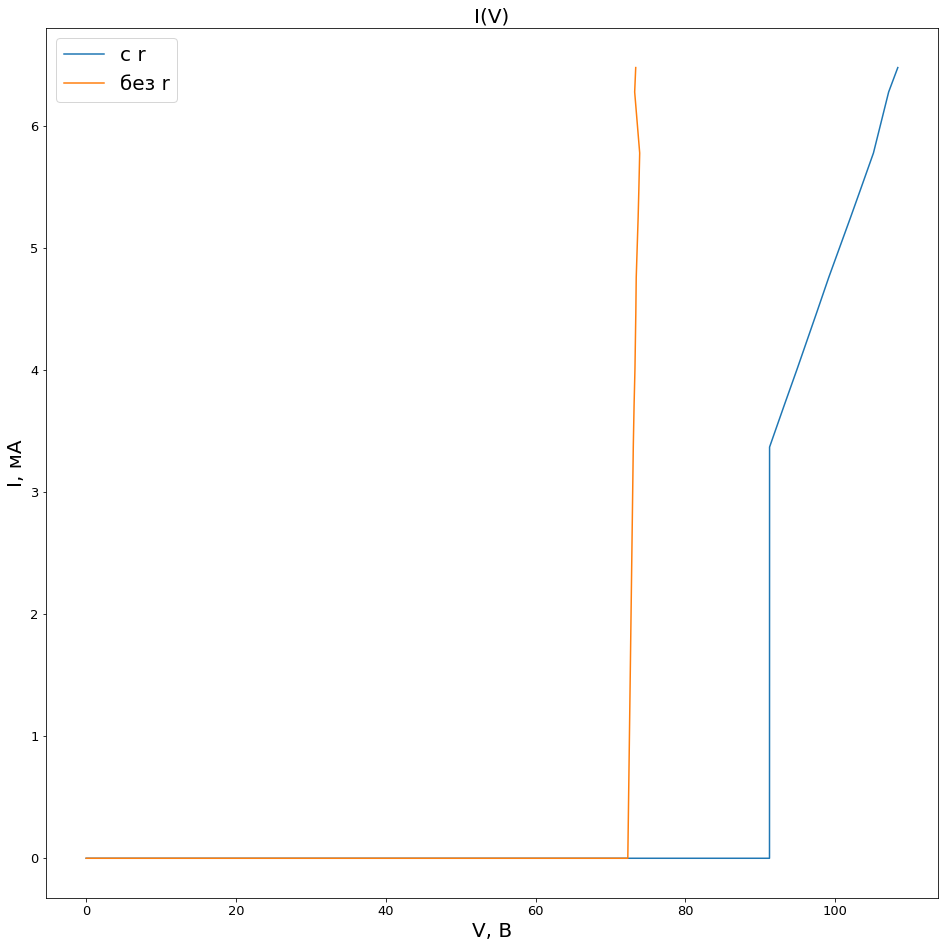

In [50]:
fig, ax1 = plt.subplots(figsize=(16,16))

plt.rc('font', size = 20) 

ax1.set_title("I(V)", size=20)

ax1.set_xlabel("V, В", size=20)
ax1.set_ylabel("I, мА", size=20)

ax1.plot(U1, I1, label="с r")
ax1.plot(U2, I1, label="без r")

ax1.legend()

plt.savefig("pictures/graph1.png")
plt.show()

In [92]:
V1 = 91.25
V2 = 75.4
I1_c = 3.37
I2_c = 0.43
U0 = 109.5
R0 = 5.2 * 10 ** 5

In [94]:
R0_t = (U0 - V2) / I2_c
R0_t

79.30232558139534

In [80]:
C = datanp[23][1:6]
C = list(map(float, C))
C = np.array(C)
C

array([0.01, 0.02, 0.03, 0.04, 0.05])

In [81]:
f = datanp[22][1:6]
f = list(map(float, f))
f = np.array(f)
f

array([150.,  75.,  50.,  37.,  30.])

In [82]:
T = 1 / f
T

array([0.00666667, 0.01333333, 0.02      , 0.02702703, 0.03333333])

In [83]:
T1 = R0 * C * np.log((U0 - V2) / (U0 - V1)) / 10 ** 6
T1

array([0.00325069, 0.00650138, 0.00975206, 0.01300275, 0.01625344])

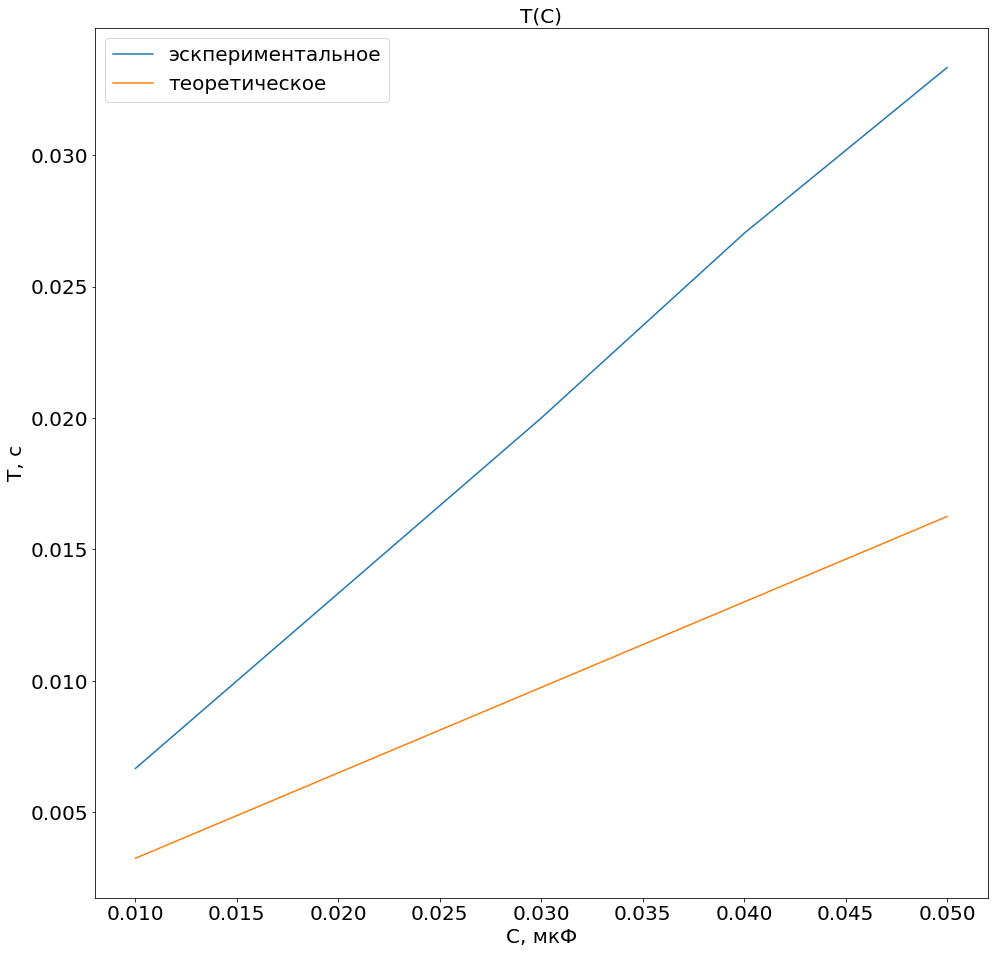

In [84]:
fig, ax1 = plt.subplots(figsize=(16,16))

plt.rc('font', size = 20) 

ax1.set_title("T(C)", size=20)

ax1.set_xlabel("C, мкФ", size=20)
ax1.set_ylabel("T, с", size=20)

ax1.plot(C, T, label="эскпериментальное")
ax1.plot(C, T1, label="теоретическое")

ax1.legend()

plt.savefig("pictures/graph2.png")
plt.show()

In [85]:
C0 = 0.05 / 10 ** 6

In [86]:
f1 = datanp[27][1:9]
f1 = list(map(float, f1))
f1 = np.array(f1)
f1

array([17. , 19. , 22. , 25.7, 31. , 39.5, 53. , 78.2])

In [87]:
R1 = datanp[28][1:9]
R1 = list(map(float, R1))
R1 = np.array(R1)
R1

array([9., 8., 7., 6., 5., 4., 3., 2.])

In [88]:
T_ = 1 / f1
T_

array([0.05882353, 0.05263158, 0.04545455, 0.03891051, 0.03225806,
       0.02531646, 0.01886792, 0.01278772])

In [89]:
T_1 = R1 * C0 * np.log((U0 - V2) / (U0 - V1)) * 10 ** 5
T_1

array([0.02813095, 0.02500529, 0.02187963, 0.01875397, 0.01562831,
       0.01250265, 0.00937698, 0.00625132])

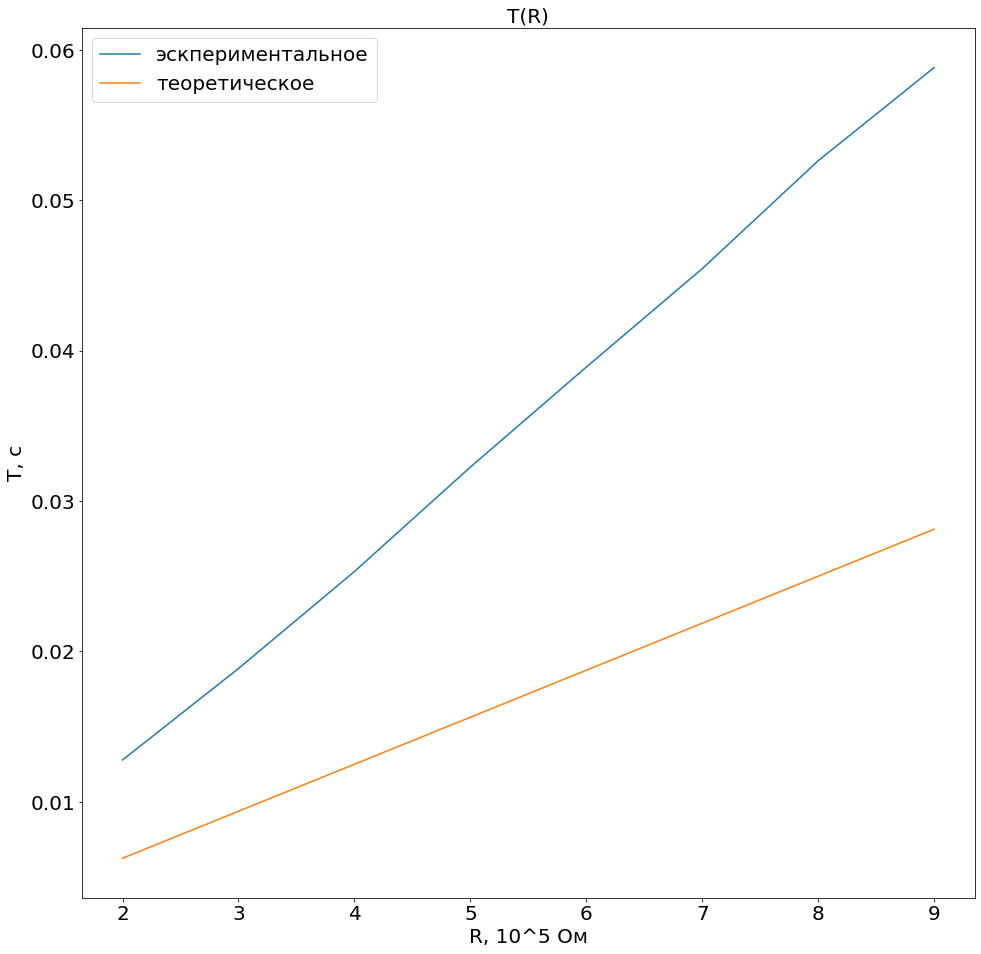

In [90]:
fig, ax1 = plt.subplots(figsize=(16,16))

plt.rc('font', size = 20) 

ax1.set_title("T(R)", size=20)

ax1.set_xlabel("R, 10^5 Ом", size=20)
ax1.set_ylabel("T, с", size=20)

ax1.plot(R1, T_, label="эскпериментальное")
ax1.plot(R1, T_1, label="теоретическое")

ax1.legend()

plt.savefig("pictures/graph3.png")
plt.show()